<a href="https://colab.research.google.com/github/vansh123321/vansh/blob/master/Malware_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries and data**

In [9]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from statistics import mode
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [10]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"vanshjatana","key":"c38bd2c70d585ec85deaead606a1d1cd"}'}

In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d nsaravana/malware-detection

malware-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
from zipfile import ZipFile
file_name = "malware-detection.zip"
with ZipFile(file_name,'r') as zp:
  zp.extractall()
  print('done')

done


In [14]:
data = pd.read_csv("/content/Malware dataset.csv")
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


In [15]:
data1=data.dropna(how="any",axis=0)
data1['classification'] = data1.classification.map({'benign':0, 'malware':1})
corr=data1.corr()
corr.nlargest(35,'classification')["classification"]

classification       1.000000
prio                 0.110036
last_interval        0.006952
min_flt              0.003070
millisecond          0.000000
gtime               -0.014416
stime               -0.042037
free_area_cache     -0.051237
total_vm            -0.059291
state               -0.064702
mm_users            -0.093641
reserved_vm         -0.118608
fs_excl_counter     -0.137883
nivcsw              -0.143791
exec_vm             -0.255123
map_count           -0.271227
static_prio         -0.317941
end_data            -0.324954
maj_flt             -0.324954
shared_vm           -0.324954
vm_truncate_count   -0.354861
utime               -0.369931
nvcsw               -0.386889
Name: classification, dtype: float64

In [16]:
!pip install pycaret


     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 389kB 8.5MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 7.0MB 8.8MB/s 
     |████████████████████████████████| 1.2MB 49.4MB/s 
     |████████████████████████████████| 266kB 46.9MB/s 
     |████████████████████████████████| 1.6MB 46.5MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
     |████████████████████████████████| 63.9MB 63kB/s 
     |████████████████████████████████| 3.2MB 46.4MB/s 
     |████████████████████████████████| 133kB 48.0MB/s 
     |████████████████████████████████| 235kB 45.8MB/s 
     |████████████████████████████████| 552kB 46.3MB/s 
     |████████████████████████████████| 71kB 9.9MB/s 
     |████████████████████████████████| 2.1MB 43.6MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 6.3MB 46.2MB/s 
   

In [17]:
from pycaret.classification import *

In [18]:
data1.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  int64 
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

In [20]:
data.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

In [21]:
X_train, X_test = train_test_split(data, test_size = 0.20, random_state = 0)

In [22]:
clf1 = setup(data = X_train, 
             target = 'classification',
             ignore_features = ["hash",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime','utime','end_data','map_count'],
             silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6564
1,Target Type,Binary
2,Label Encoded,"benign: 0, malware: 1"
3,Original Data,"(80000, 35)"
4,Missing Values,False
5,Numeric Features,15
6,Categorical Features,19
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [24]:
dt  = create_model('dt')      


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
4,0.9998,0.9998,0.9996,1.0,0.9998,0.9996
5,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0,1.0000,1.0000


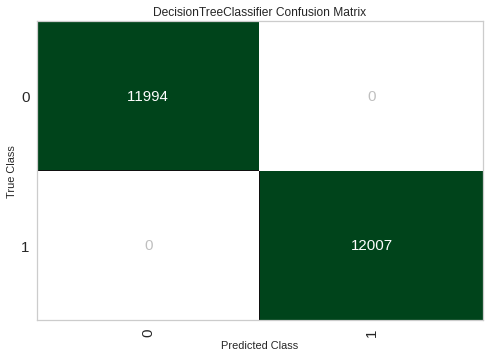

In [25]:
plot_model(estimator = dt, plot = 'confusion_matrix')


In [27]:
evaluate_model(dt)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [28]:
x= X_test.drop("classification",axis=1)
y=X_test["classification"]


In [29]:
predict_model(dt, data=x)


,hash,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw,Label,Score
0,5dd6c684ad85ec01c32172a38451f0b6f3b261dce3c335...,582,0,0,3070189568,15396,0,0,0,15694,0,0,18,783,6351,0,91,112,135,209,0,112,7509,348750,114,0,112,1,3204448256,387715,5,8,0,0,1,1.0
1,com.zayaninfotech.english.grammar.apk,498,0,0,3069853696,15265,0,0,0,18733,0,0,0,692,7865,0,119,120,127,458,0,120,5492,352346,0,1,120,0,3204448256,388191,5,0,0,0,0,0.0
2,com.sonypicturestelevision.sportsjeopardy.apk,227,1028096,0,3069784064,19564,0,0,0,14108,0,0,0,670,6389,0,196,120,121,243,0,120,0,345728,123,0,120,2,3204448256,383266,3,4,0,0,0,0.0
3,com.ezmusicplayer.demo.apk,333,0,0,3069685760,15950,0,0,0,15137,0,0,0,725,7246,0,294,120,126,254,0,120,5492,348372,69,0,120,3,3204448256,385765,5,7,0,0,0,0.0
4,5dd6c684ad85ec01c32172a38451f0b6f3b261dce3c335...,885,1024000,0,3070189568,22477,0,0,0,18965,0,0,21,902,10341,0,221,114,169,378,0,114,9526,361239,114,1,114,1,3204448256,398693,5,8,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,com.zayaninfotech.english.grammar.apk,116,0,0,3069853696,15265,0,0,0,18733,0,0,0,692,7865,0,100,120,127,161,0,120,5492,352346,0,1,120,0,3204448256,388191,5,0,0,0,0,0.0
19996,com.roidapp.photogrid.apk,415,0,0,3069292544,24311,0,0,0,17901,0,0,4,798,11480,0,447,114,149,247,0,114,2,354218,125,0,114,5,3204448256,389092,4,8,0,0,0,0.0
19997,com.medicaljoyworks.prognosis.apk,763,61440,0,3070078976,16624,0,0,0,15602,0,0,1,771,10700,0,198,120,120,356,0,120,3475,348263,85,0,120,3,3204448256,385674,5,3,0,0,0,0.0
19998,116ae92ecfacb70146fe643d92878e522f71af393702f3...,345,4096,0,3070173184,14020,0,0,0,9695,0,0,0,613,2655,0,24,120,94,53,0,120,0,337751,0,1,120,0,3204448256,371786,3,0,0,0,1,1.0


In [30]:
predictions = predict_model(dt, data=x)
predictions.head()

,hash,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw,Label,Score
0,5dd6c684ad85ec01c32172a38451f0b6f3b261dce3c335...,582,0,0,3070189568,15396,0,0,0,15694,0,0,18,783,6351,0,91,112,135,209,0,112,7509,348750,114,0,112,1,3204448256,387715,5,8,0,0,1,1.0
1,com.zayaninfotech.english.grammar.apk,498,0,0,3069853696,15265,0,0,0,18733,0,0,0,692,7865,0,119,120,127,458,0,120,5492,352346,0,1,120,0,3204448256,388191,5,0,0,0,0,0.0
2,com.sonypicturestelevision.sportsjeopardy.apk,227,1028096,0,3069784064,19564,0,0,0,14108,0,0,0,670,6389,0,196,120,121,243,0,120,0,345728,123,0,120,2,3204448256,383266,3,4,0,0,0,0.0
3,com.ezmusicplayer.demo.apk,333,0,0,3069685760,15950,0,0,0,15137,0,0,0,725,7246,0,294,120,126,254,0,120,5492,348372,69,0,120,3,3204448256,385765,5,7,0,0,0,0.0
4,5dd6c684ad85ec01c32172a38451f0b6f3b261dce3c335...,885,1024000,0,3070189568,22477,0,0,0,18965,0,0,21,902,10341,0,221,114,169,378,0,114,9526,361239,114,1,114,1,3204448256,398693,5,8,0,0,1,1.0


In [31]:
y = y.map({'benign':0, 'malware':1})

In [32]:
y_pred = round(predictions['Label']).astype(int)
y_act = y

In [33]:
from sklearn.metrics import classification_report, confusion_matrix


In [34]:
y_pred.isna().sum()

0

In [35]:
X_test.shape

(20000, 35)

In [36]:
print(confusion_matrix(y_act,y_pred))


[[10023     0]
 [    0  9977]]


In [37]:
print(classification_report(y_act,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10023
           1       1.00      1.00      1.00      9977

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

